Adjacency Matrix:
[[0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


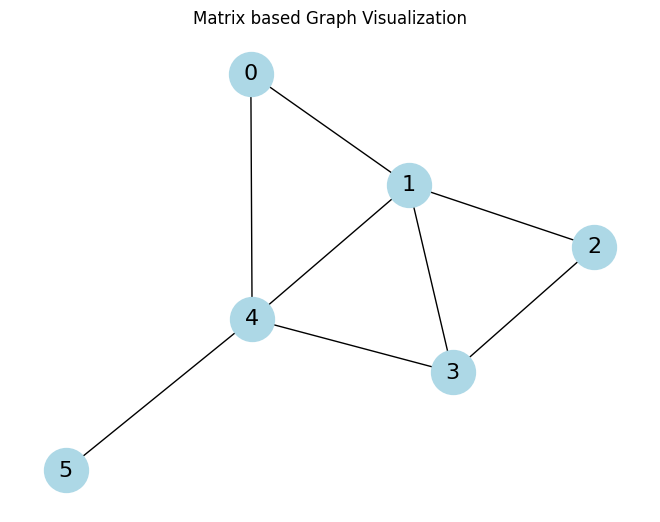

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adjacency_matrix = np.zeros((num_vertices, num_vertices))

    def add_edge(self, u, v):
        self.adjacency_matrix[u][v] = 1
        self.adjacency_matrix[v][u] = 1  # For undirected graph

    def display(self):
        print("Adjacency Matrix:")
        print(self.adjacency_matrix)

    def plot(self):
        G = nx.Graph()  # Create an undirected graph
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(u + 1, self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16, font_color='black')
        plt.title('Matrix based Graph Visualization')
        plt.show()


graph = Graph(6)  
graph.add_edge(0, 1)
graph.add_edge(0, 4)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(5, 4)
graph.display()  
graph.plot()     

Adjacency Matrix:
[[0. 1. 0. 0. 1. 0.]
 [1. 0. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0.]]


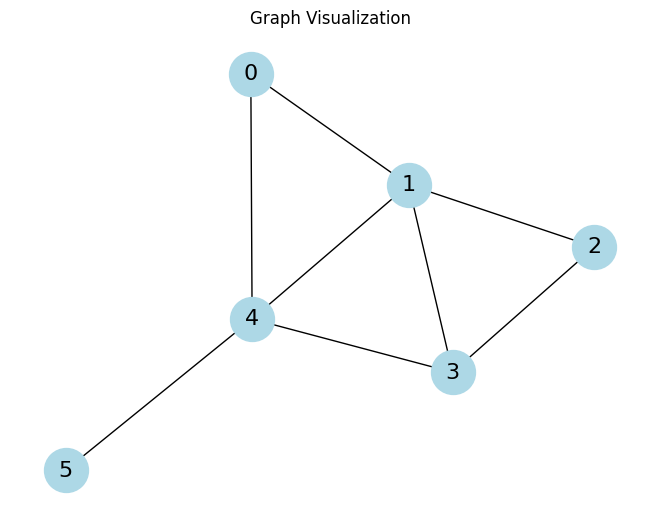

DFS traversal starting from vertex 0: [0, 1, 2, 3, 4, 5]
BFS traversal starting from vertex 0: [0, 1, 4, 2, 3, 5]


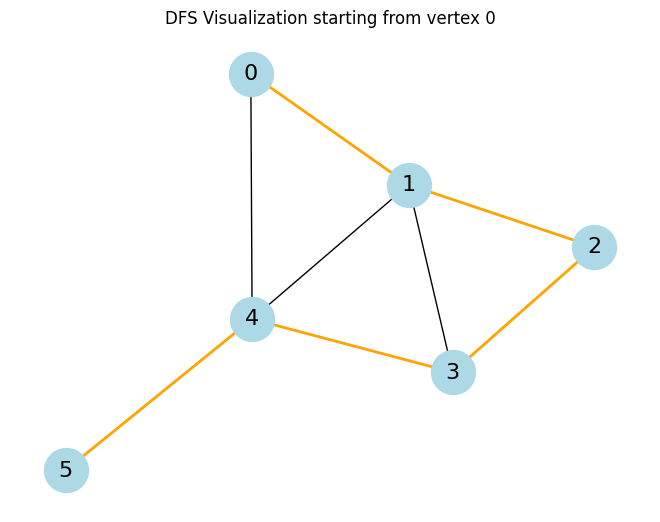

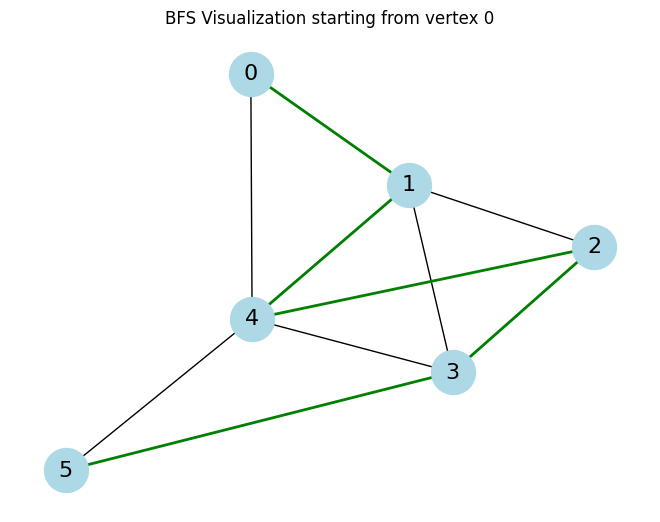

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adjacency_matrix = np.zeros((num_vertices, num_vertices))

    def add_edge(self, u, v):
        self.adjacency_matrix[u][v] = 1
        self.adjacency_matrix[v][u] = 1 

    def display(self):
        print("Adjacency Matrix:")
        print(self.adjacency_matrix)

    def plot(self):
        G = nx.Graph()  # Create an undirected graph
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(u + 1, self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16, font_color='black')
        plt.title('Graph Visualization')
        plt.show()

    def dfs(self, start):
        visited = set()
        traversal_order = []

        def dfs_recursive(vertex):
            visited.add(vertex)
            traversal_order.append(vertex)
            for neighbor in range(self.num_vertices):
                if self.adjacency_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                    dfs_recursive(neighbor)

        dfs_recursive(start)
        return traversal_order

    def bfs(self, start):
        visited = set()
        queue = deque([start])
        visited.add(start)
        traversal_order = []

        while queue:
            vertex = queue.popleft()
            traversal_order.append(vertex)
            for neighbor in range(self.num_vertices):
                if self.adjacency_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        return traversal_order

    def plot_dfs(self, start):
        dfs_order = self.dfs(start)
        
        G = nx.Graph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(u + 1, self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16, font_color='black')

        # Highlight DFS path
        dfs_edges = [(dfs_order[i], dfs_order[i + 1]) for i in range(len(dfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='orange', width=2)

        plt.title(f'DFS Visualization starting from vertex {start}')
        plt.show()

    def plot_bfs(self, start):
        bfs_order = self.bfs(start)
        
        G = nx.Graph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(u + 1, self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16, font_color='black')

        # Highlight BFS path
        bfs_edges = [(bfs_order[i], bfs_order[i + 1]) for i in range(len(bfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='green', width=2)

        plt.title(f'BFS Visualization starting from vertex {start}')
        plt.show()

# Example usage
if __name__ == "__main__":
    graph = Graph(6)  # Create a graph with 6 vertices
    graph.add_edge(0, 1)
    graph.add_edge(0, 4)
    graph.add_edge(1, 2)
    graph.add_edge(1, 3)
    graph.add_edge(1, 4)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)
    graph.add_edge(5, 4)

    graph.display()  # Display the adjacency matrix
    graph.plot()     # Plot the graph

    # Perform DFS and BFS
    dfs_result = graph.dfs(0)
    bfs_result = graph.bfs(0)

    print(f"DFS traversal starting from vertex 0: {dfs_result}")
    print(f"BFS traversal starting from vertex 0: {bfs_result}")

    # Plot DFS and BFS traversals
    graph.plot_dfs(0)
    graph.plot_bfs(0)

Adjacency Matrix:
[[0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


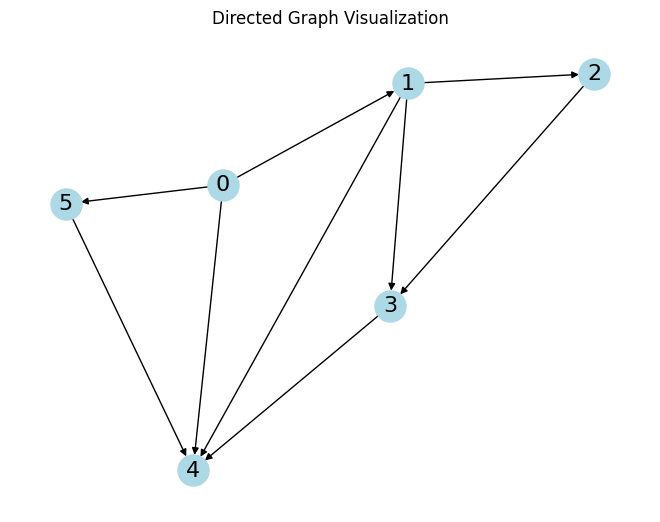

DFS traversal starting from vertex 0: [0, 1, 2, 3, 4, 5]
BFS traversal starting from vertex 0: [0, 1, 4, 5, 2, 3]


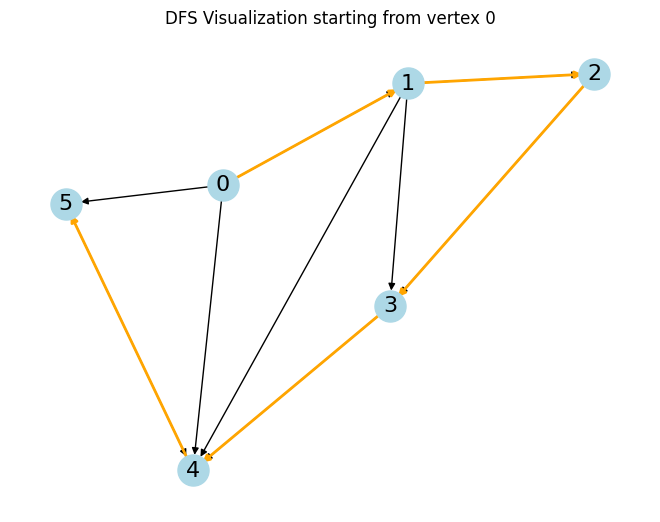

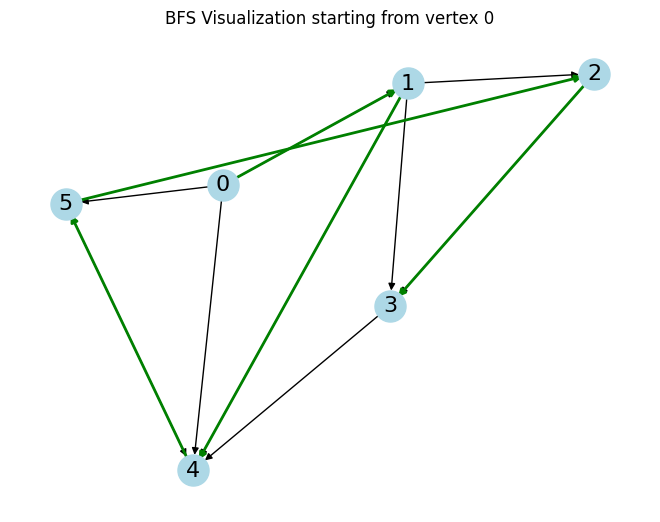

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adjacency_matrix = np.zeros((num_vertices, num_vertices))

    def add_edge(self, u, v):
        self.adjacency_matrix[u][v] = 1  # Only add the edge from u to v

    def display(self):
        print("Adjacency Matrix:")
        print(self.adjacency_matrix)

    def plot(self):
        G = nx.DiGraph()  # Create a directed graph
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_color='black', arrows=True)
        plt.title('Directed Graph Visualization')
        plt.show()

    def dfs(self, start):
        visited = set()
        traversal_order = []

        def dfs_recursive(vertex):
            visited.add(vertex)
            traversal_order.append(vertex)
            for neighbor in range(self.num_vertices):
                if self.adjacency_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                    dfs_recursive(neighbor)

        dfs_recursive(start)
        return traversal_order

    def bfs(self, start):
        visited = set()
        queue = deque([start])
        visited.add(start)
        traversal_order = []

        while queue:
            vertex = queue.popleft()
            traversal_order.append(vertex)
            for neighbor in range(self.num_vertices):
                if self.adjacency_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        return traversal_order

    def plot_dfs(self, start):
        dfs_order = self.dfs(start)
        
        G = nx.DiGraph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_color='black', arrows=True)

        # Plot DFS path
        dfs_edges = [(dfs_order[i], dfs_order[i + 1]) for i in range(len(dfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='orange', width=2, arrows=True)

        plt.title(f'DFS Visualization starting from vertex {start}')
        plt.show()

    def plot_bfs(self, start):
        bfs_order = self.bfs(start)
        
        G = nx.DiGraph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_color='black', arrows=True)

        # Plot BFS path
        bfs_edges = [(bfs_order[i], bfs_order[i + 1]) for i in range(len(bfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='green', width=2, arrows=True)

        plt.title(f'BFS Visualization starting from vertex {start}')
        plt.show()


graph = Graph(6)  
graph.add_edge(0, 1)
graph.add_edge(0, 4)
graph.add_edge(0, 5)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(5, 4)
graph.display()  # Display the adjacency matrix
graph.plot()     # Plot the graph
# Perform DFS and BFS
dfs_result = graph.dfs(0)
bfs_result = graph.bfs(0)
print(f"DFS traversal starting from vertex 0: {dfs_result}")
print(f"BFS traversal starting from vertex 0: {bfs_result}")
# Plot DFS and BFS traversals
graph.plot_dfs(0)
graph.plot_bfs(0)

Adjacency Matrix:
[[0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


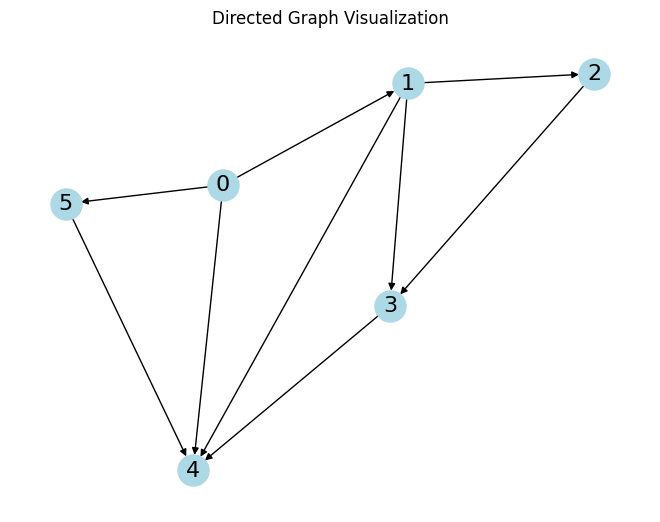

DFS traversal starting from vertex 0: [0, 1, 2, 3, 4, 5]
BFS traversal starting from vertex 0: [0, 1, 4, 5, 2, 3]


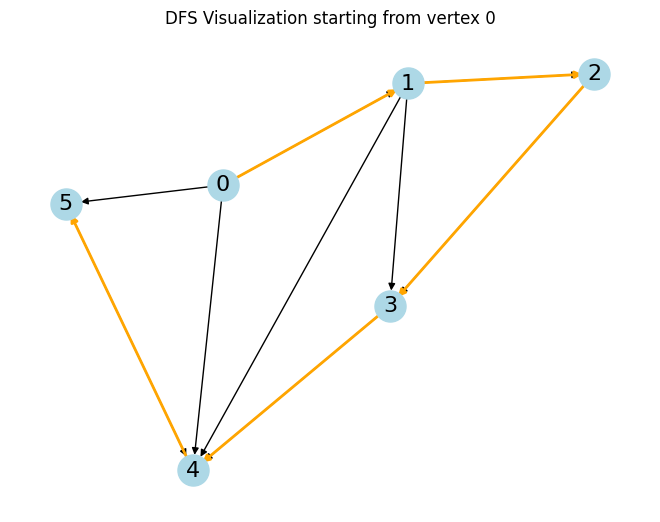

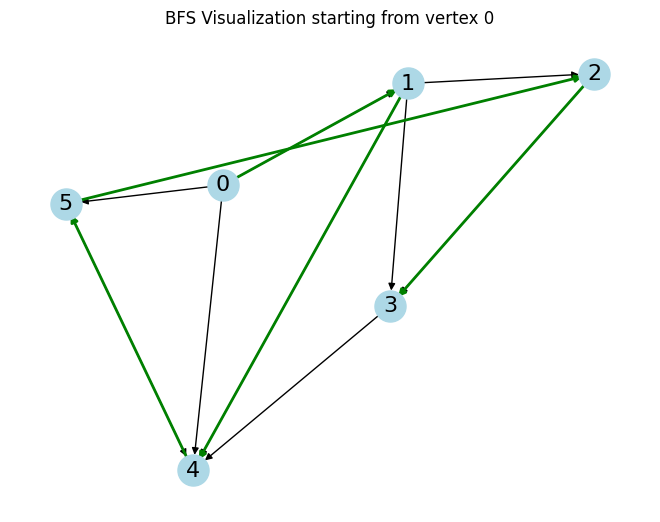

After deleting edge (1, 4):
Adjacency Matrix:
[[0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


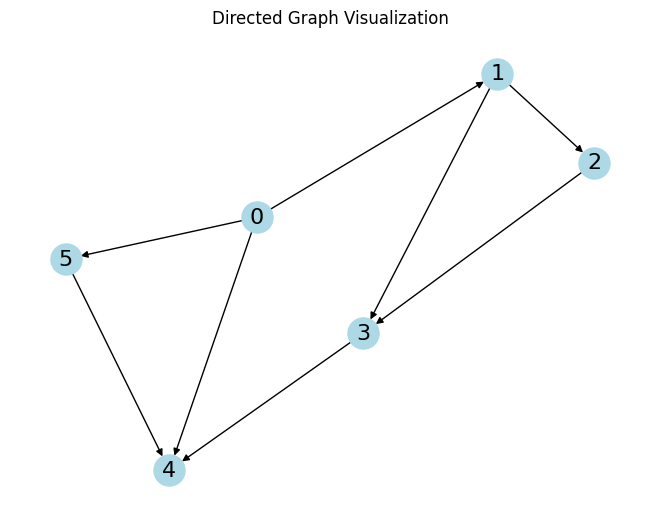

After deleting node 3:
Adjacency Matrix:
[[0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


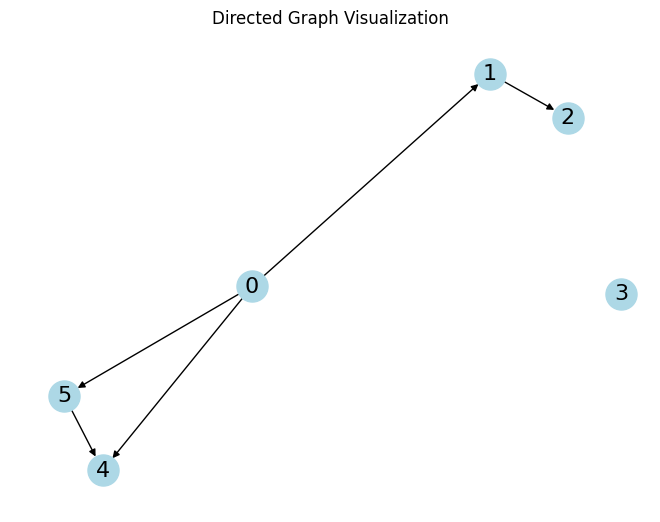

DFS traversal starting from vertex 0: [0, 1, 2, 3, 4, 5]
BFS traversal starting from vertex 0: [0, 1, 4, 5, 2, 3]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adjacency_matrix = np.zeros((num_vertices, num_vertices))

    def add_edge(self, u, v):
        self.adjacency_matrix[u][v] = 1  # Only add the edge from u to v

    def delete_edge(self, u, v):
        """Delete an edge from u to v."""
        self.adjacency_matrix[u][v] = 0  # Remove the edge

    def delete_node(self, node):
        """Delete a node and all associated edges."""
        if node >= self.num_vertices:
            print(f"Node {node} does not exist.")
            return
        
        # Remove all edges associated with the node
        self.adjacency_matrix[node, :] = 0  # Remove all outgoing edges
        self.adjacency_matrix[:, node] = 0  # Remove all incoming edges
        

    def display(self):
        print("Adjacency Matrix:")
        print(self.adjacency_matrix)

    def plot(self):
        G = nx.DiGraph()  # Create a directed graph
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_color='black', arrows=True)
        plt.title('Directed Graph Visualization')
        plt.show()

    def dfs(self, start):
        visited = set()
        traversal_order = []

        def dfs_recursive(vertex):
            visited.add(vertex)
            traversal_order.append(vertex)
            for neighbor in range(self.num_vertices):
                if self.adjacency_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                    dfs_recursive(neighbor)

        dfs_recursive(start)
        return traversal_order

    def bfs(self, start):
        visited = set()
        queue = deque([start])
        visited.add(start)
        traversal_order = []

        while queue:
            vertex = queue.popleft()
            traversal_order.append(vertex)
            for neighbor in range(self.num_vertices):
                if self.adjacency_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        return traversal_order

    def plot_dfs(self, start):
        dfs_order = self.dfs(start)
        
        G = nx.DiGraph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_color='black', arrows=True)

        # Plot DFS path
        dfs_edges = [(dfs_order[i], dfs_order[i + 1]) for i in range(len(dfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='orange', width=2, arrows=True)

        plt.title(f'DFS Visualization starting from vertex {start}')
        plt.show()

    def plot_bfs(self, start):
        bfs_order = self.bfs(start)
        
        G = nx.DiGraph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_color='black', arrows=True)

        # Plot BFS path
        bfs_edges = [(bfs_order[i], bfs_order[i + 1]) for i in range(len(bfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='green', width=2, arrows=True)

        plt.title(f'BFS Visualization starting from vertex {start}')
        plt.show()


graph = Graph(6)  
graph.add_edge(0, 1)
graph.add_edge(0, 4)
graph.add_edge(0, 5)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(5, 4)

graph.display()  # Display the adjacency matrix
graph.plot()     # Plot the graph

# Perform DFS and BFS
dfs_result = graph.dfs(0)
bfs_result = graph.bfs(0)

print(f"DFS traversal starting from vertex 0: {dfs_result}")
print(f"BFS traversal starting from vertex 0: {bfs_result}")

# Plot DFS and BFS traversals
graph.plot_dfs(0)
graph.plot_bfs(0)

# Delete an edge and a node
graph.delete_edge(1, 4)  # Delete edge from 1 to 4
print("After deleting edge (1, 4):")
graph.display()
graph.plot()

graph.delete_node(3)  # Delete node 3
print("After deleting node 3:")
graph.display()
graph.plot()
print(f"DFS traversal starting from vertex 0: {dfs_result}")
print(f"BFS traversal starting from vertex 0: {bfs_result}")

Initial Graph:
Adjacency Matrix:
[[0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


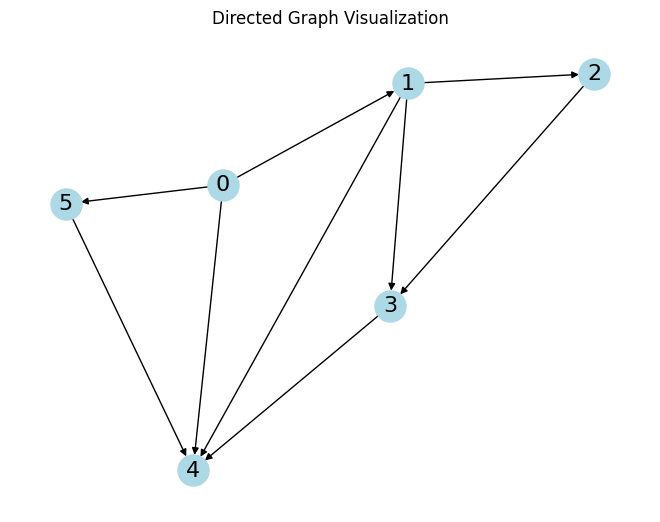


Graph after deleting edge (1 → 4):
Adjacency Matrix:
[[0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


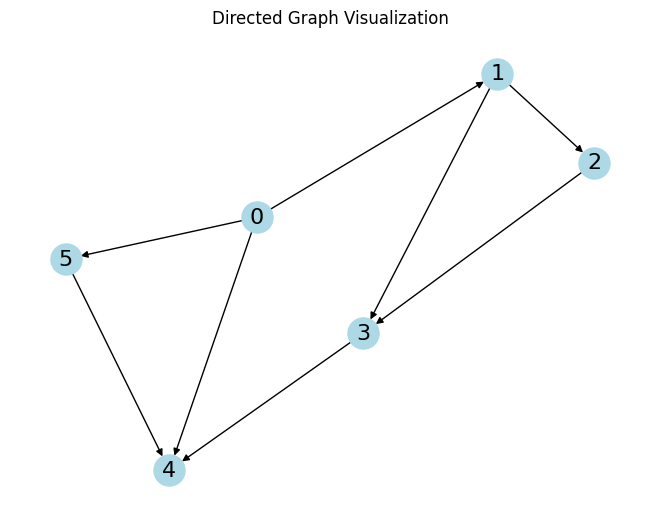


Graph after deleting node 3:
Adjacency Matrix:
[[0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


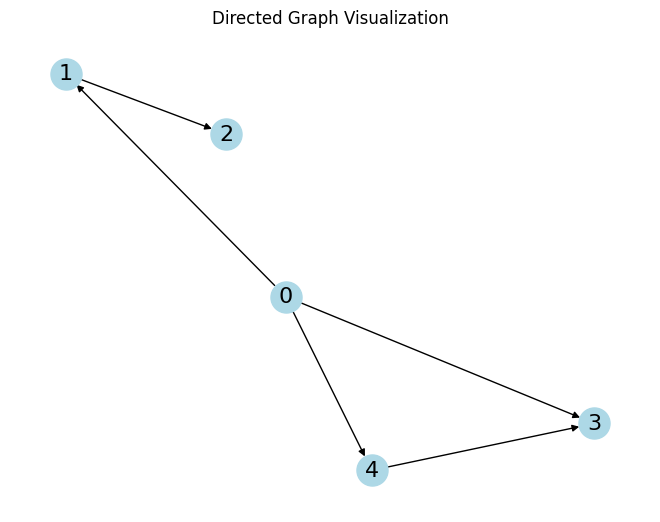

DFS traversal starting from vertex 0: [0, 1, 2, 3, 4]
BFS traversal starting from vertex 0: [0, 1, 3, 4, 2]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

class Graph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adjacency_matrix = np.zeros((num_vertices, num_vertices))

    def add_edge(self, u, v):
        """Adds a directed edge from u to v."""
        self.adjacency_matrix[u][v] = 1  

    def delete_edge(self, u, v):
        """Deletes a directed edge from u to v."""
        self.adjacency_matrix[u][v] = 0  

    def delete_node(self, node):
        """Deletes a node by removing its row and column from the adjacency matrix."""
        if node >= self.num_vertices:
            print("Invalid node index")
            return
        
        self.adjacency_matrix = np.delete(self.adjacency_matrix, node, axis=0)  # Remove row
        self.adjacency_matrix = np.delete(self.adjacency_matrix, node, axis=1)  # Remove column
        self.num_vertices -= 1  # Reduce vertex count

    def display(self):
        """Displays the adjacency matrix."""
        print("Adjacency Matrix:")
        print(self.adjacency_matrix)

    def plot(self):
        """Plots the directed graph."""
        G = nx.DiGraph()
        for i in range(self.num_vertices):
            G.add_node(i)
        for u in range(self.num_vertices):
            for v in range(self.num_vertices):
                if self.adjacency_matrix[u][v] == 1:
                    G.add_edge(u, v)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_color='black', arrows=True)
        plt.title('Directed Graph Visualization')
        plt.show()

    def dfs(self, start):
        """Performs Depth-First Search (DFS)."""
        visited = set()
        traversal_order = []

        def dfs_recursive(vertex):
            visited.add(vertex)
            traversal_order.append(vertex)
            for neighbor in range(self.num_vertices):
                if self.adjacency_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                    dfs_recursive(neighbor)

        dfs_recursive(start)
        return traversal_order

    def bfs(self, start):
        """Performs Breadth-First Search (BFS)."""
        visited = set()
        queue = deque([start])
        visited.add(start)
        traversal_order = []

        while queue:
            vertex = queue.popleft()
            traversal_order.append(vertex)
            for neighbor in range(self.num_vertices):
                if self.adjacency_matrix[vertex][neighbor] == 1 and neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        return traversal_order


graph = Graph(6)  
graph.add_edge(0, 1)
graph.add_edge(0, 4)
graph.add_edge(0, 5)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(5, 4)

print("Initial Graph:")
graph.display()
graph.plot()

# Delete an edge (1 → 4)
graph.delete_edge(1, 4)
print("\nGraph after deleting edge (1 → 4):")
graph.display()
graph.plot()

# Delete a node (node 3)
graph.delete_node(3)
print("\nGraph after deleting node 3:")
graph.display()
graph.plot()

# Perform DFS and BFS
dfs_result = graph.dfs(0)
bfs_result = graph.bfs(0)
print(f"DFS traversal starting from vertex 0: {dfs_result}")
print(f"BFS traversal starting from vertex 0: {bfs_result}")
